In [1]:
import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

In [2]:
from gradio_tools.tools import StableDiffusionTool

In [3]:
local_file_path = StableDiffusionTool().langchain.run(
    "Please create a photo of a dog riding a skateboard"
)
local_file_path

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔

Job Status: Status.STARTING eta: None


'C:\\Users\\test\\AppData\\Local\\Temp\\gradio\\6e667eac4e2192f7f5174cfe05f1e9f7eb66364e\\tmpire86e7g.png'

In [5]:
from PIL import Image

In [6]:
im = Image.open(local_file_path)

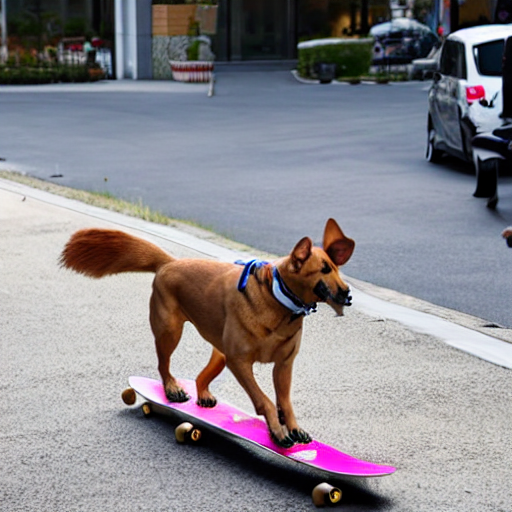

In [7]:
display(im)

### using with an agent:

In [8]:
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
from gradio_tools.tools import(
    StableDiffusionTool,
    ImageCaptioningTool,
    StableDiffusionPromptGeneratorTool,
    TextToVideoTool,
)

In [10]:
from langchain.memory import ConversationBufferMemory

llm = OpenAI(temperature=0)
memory = ConversationBufferMemory(memory_key="chat_history")
tools=[
    StableDiffusionTool().langchain,
    ImageCaptioningTool().langchain,
    StableDiffusionPromptGeneratorTool().langchain,
    TextToVideoTool().langchain,
]

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔
Loaded as API: https://gradio-client-demos-blip-2.hf.space ✔
Loaded as API: https://microsoft-promptist.hf.space ✔
Loaded as API: https://damo-vilab-modelscope-text-to-video-synthesis.hf.space ✔


In [11]:
agent = initialize_agent(
    tools, llm, memory=memory, agent="conversational-react-description", verbose=True
)
output = agent.run(
    input=(
        "Please create a photo of a dog riding a skateboard "
        "but improve my prompt prior to using an image generator."
        "Please caption the generated image and create a video for it using the improved prompt."
    )
)



> Entering new  chain...

Thought: Do I need to use a tool? Yes
Action: StableDiffusionPromptGenerator
Action Input: A dog riding a skateboard
Job Status: Status.STARTING eta: None

Observation: A dog riding a skateboard, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha
Thought: Do I need to use a tool? Yes
Action: StableDiffusion
Action Input: A dog riding a skateboard, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha
Job Status: Status.STARTING eta: None

Observation: C:\Users\test\AppData\Local\Temp\gradio\53bf389379a747cc4f3967ca01d7060657ff85b1\tmp8eyte9pb.png
Thought: Do I need to use a tool? Yes
Action: ImageCaptioner
Action Input: C:\Users\test\AppData\Local\Temp\gradio\53bf389379a747cc4f3967ca01d7060657ff85b1\tmp8eyte9pb.png
Job Status: Status.STARTING eta: None

Observation: a painting of a dog on a skateboard
Th